In [20]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
%matplotlib inline

# Дипломная работа по курсу «Python для анализа данных»

1.Загрузить файл hr.csv (можно найти во сложении к заданию)

2.Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

3.Рассчитать и визуализировать корреляционную матрицу для переменных

4.Визуализировать несколько взаимосвязей между переменными

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными

6.Рассчитать сколько работников работает в каждом департаменте

7.Показать распределение сотрудников по зарплатам

8.Показать распределение сотрудников по зарплатам совместно с департаментами

9.Сколько сотрудников покинули компанию

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

In [38]:
df=pd.read_csv('HR.csv')
df = df.reset_index()
df.head()

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
df=pd.read_csv('HR.csv')


In [23]:
# 2.Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
#Считаем медианы по всем столбцам датафрйма
df.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [24]:
#Считаем среднее по всем столбцам датафрйма
df.mean()
#Вывод. по Медиане и среднему 
#Из данного показателя, можем сделать вывод, что в среднем человек работал в компании 200 часов в меся, у него 3.8 проекта
#Уровень удовлетвороенности сотрудниками около 64% и 71% по данным посоедней аттестации. 
# В среднем человек работает в компании 3 года

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [25]:
#Считаем среднее квадратическое отклонение по всем столбцам датафрйма
df.std()
#Среднеквадратическое отклонение показывает насколько сильно сильно разбросаны элементы популяции друг от друга
#меньшее значение, соответственно, показывает, что значения в множестве сгруппированы вокруг среднего значения
# из данных показателей интересно, что у нас большой разброс по кол-ву рабочих дней, кто и 310 часов работал, а кто то 96
#похожее распределение с кол-во лет отработанных в компании

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

In [26]:
#Считаем моду по всем столбцам датафрйма
df.mode()

# Мода показывает какое знаечение встречается чаще всего в популяции. Интересно, что мода по отработанным часам отличается от
# медианы и среднего

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Считаем минимальные значения по всем столбцам датафрйма
df.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object

In [28]:
#Считаем максимальные значения по всем столбцам датафрйма
df.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

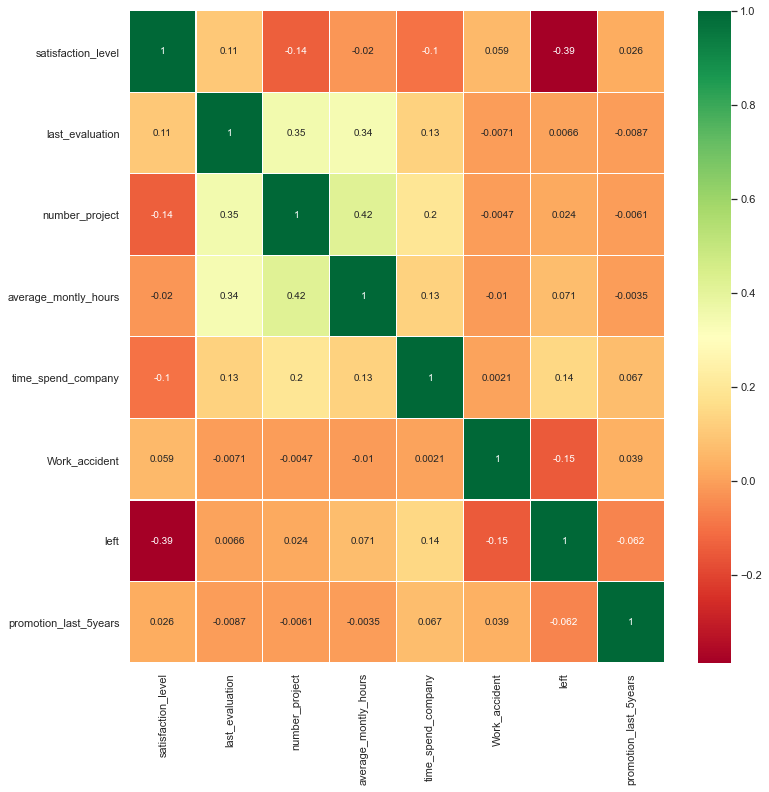

In [29]:
#3.Рассчитать и визуализировать корреляционную матрицу для переменных
#Строим матрицу корреляций

sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

# Вывод.

Из данной матрицы видим, что сильных корреляций между показателями датафрейма не так много, за исключением:
    1. Обратная корреляция между сотрудниками покинувшими компниями и их удовлетворенностью в работе. 
    Сотрудникам с низиким показателям, чаще уходили, чем те у кого высокий рейтинг. Коррлеляиия = - 0.39 обратная
    2. Кол-вол проектов и средняя кол-во рабочих часов месяц. Что тоже логично. Чем больше проектов, тем большче часов тратишь
    Корреляция 0.42
    3. Также чем больше проектов у людей, тем лучше у них результат последней оценки. Логично, чем более талантливый
    и старательный сотрудник, тем больше ему доверяют проектов. Корреляция 0.34
    

Коэффициент корреляции Пирсона: 0.41721063440177725


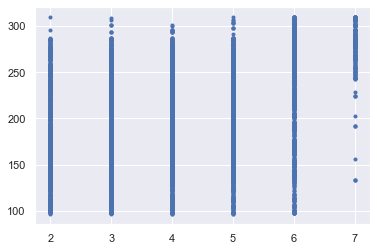

In [30]:
#4 Визуализировать несколько взаимосвязей между переменными

x = df['number_project'].dropna()
y = df['average_montly_hours'].dropna()

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

In [ ]:
#На этом графике и значени Пирсона видим тоже самое что и в п.3 Чем больше проектов у сотрудника, чем больше часов он тратит.

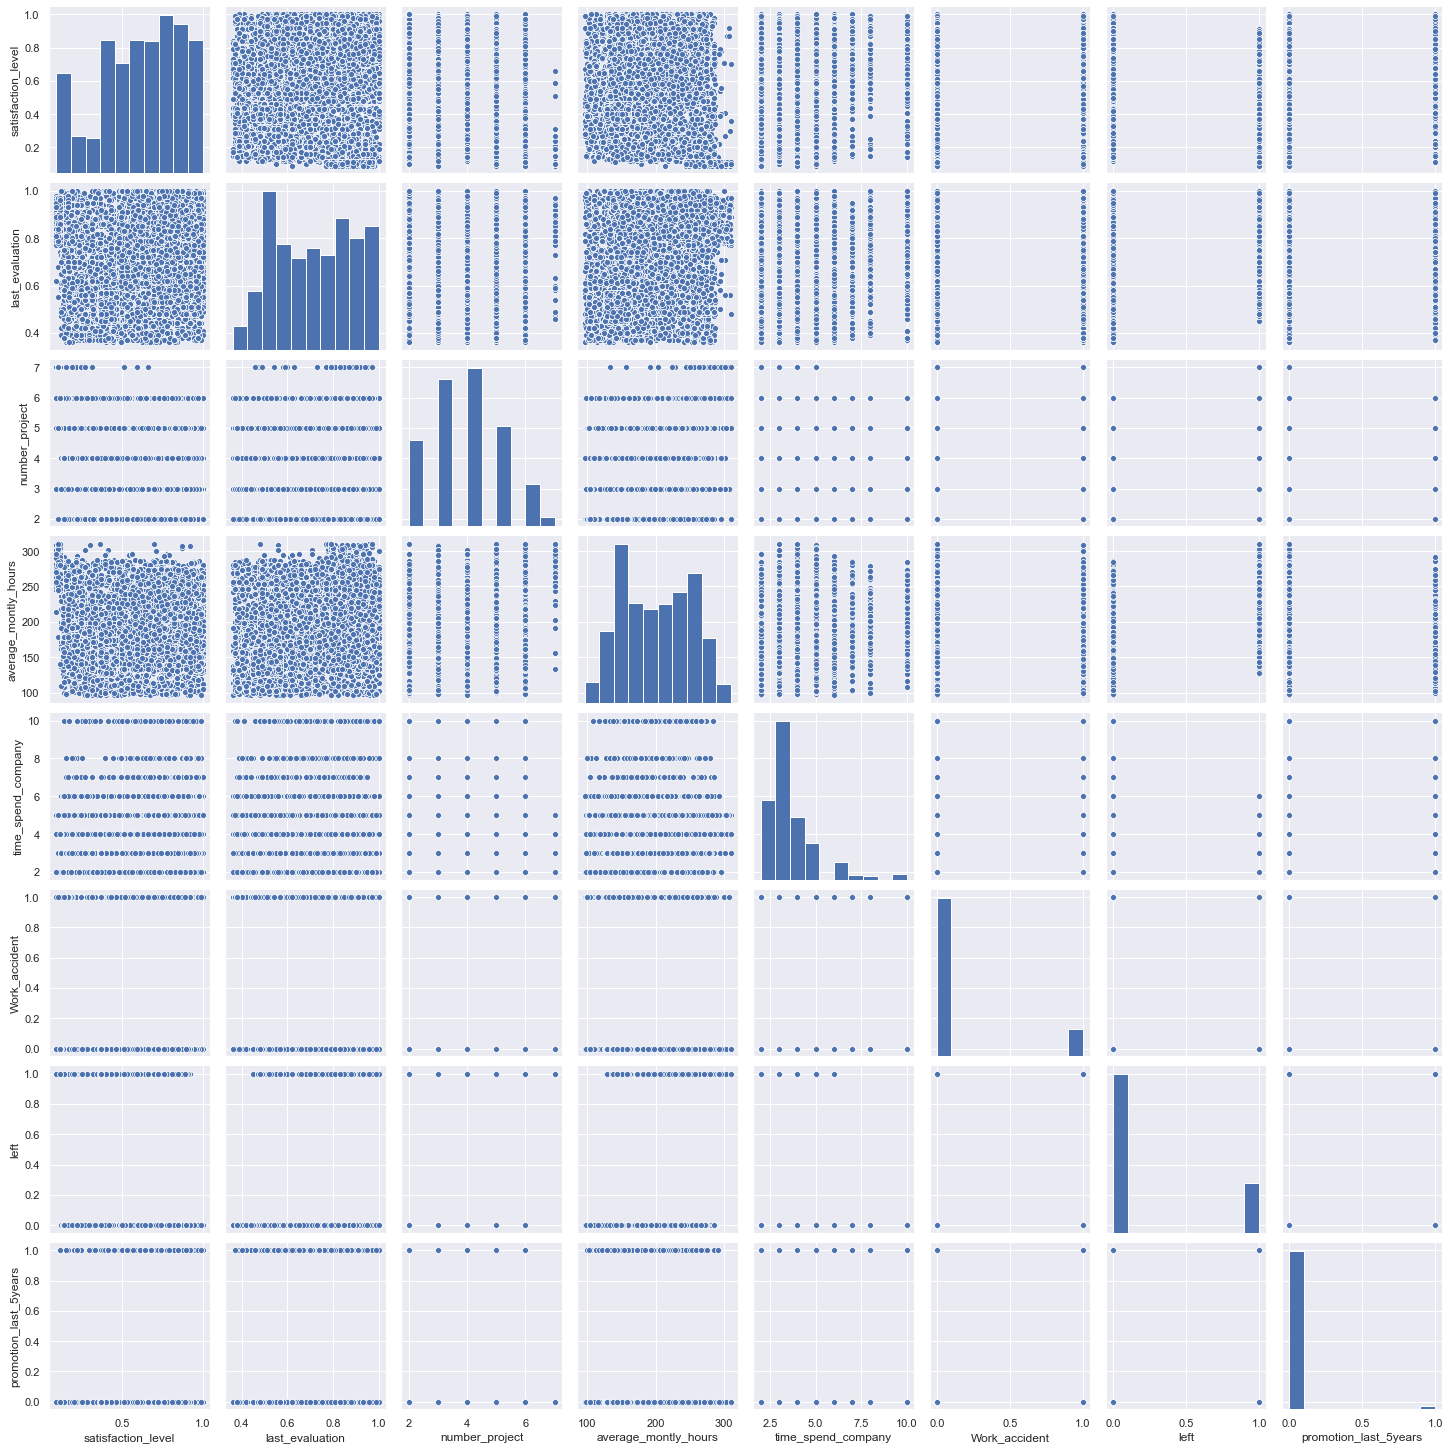

In [31]:
#Построим попарные графики для выборок, а также частотные графики на главной диагонали с помощью метода pairplot.
g = sns.pairplot(df)

# Выводы:
    1. Распределение по average hours похоже на нормальное
    2. Распределенеие по work accidends, left, promotion_last_5 years - это распределение бернулли. 
    Потому что там значения 0 или 1
    3.У уволившихся сотрудников уровень удовлетворения ниже чем у остальных
    4. Уволившиеся сотрудники работали больше часов, чем не уволившиейся

In [32]:
#5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными
#посмотрит взаимосвязь по satisfaction level между уволенными и не уволенными.

df_left= df[df['left']==1]['satisfaction_level']
df_not_left= df[df['left']==0]['satisfaction_level']


In [33]:
print(stats.ttest_ind(df_left, df_not_left))

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)


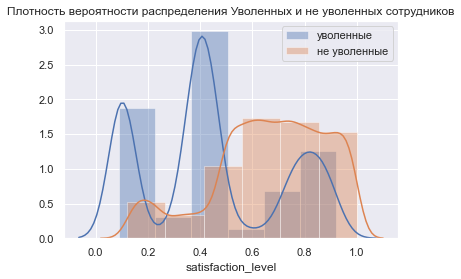

In [34]:
sns.distplot(df_left, 6)
sns.distplot(df_not_left, 6)
plt.title('Плотность вероятности распределения Уволенных и не уволенных сотрудников')
plt.legend(['уволенные', 'не уволенные'])
plt.show()

#Выборки не похожи

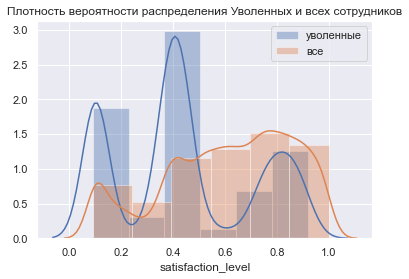

In [35]:
sns.distplot(df_left, 6)
sns.distplot(df['satisfaction_level'], 6)
plt.title('Плотность вероятности распределения Уволенных и всех сотрудников')
plt.legend(['уволенные', 'все'])
plt.show()
#Выборки всех сотрудников и уволенных не похожи.

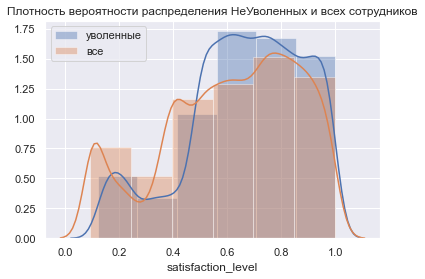

Ttest_indResult(statistic=18.457519811640605, pvalue=1.3563197471200525e-75)
Ttest_1sampResult(statistic=26.577799941338863, pvalue=4.5259233104411325e-151)


In [36]:

sns.distplot(df_not_left, 6)
sns.distplot(df['satisfaction_level'], 6)
plt.title('Плотность вероятности распределения НеУволенных и всех сотрудников')
plt.legend(['уволенные', 'все'])
plt.show()
print(stats.ttest_ind(df_not_left, df['satisfaction_level'] ))
print(stats.ttest_1samp(df_not_left, df['satisfaction_level'].mean()))

#Выборки всех сотрудников и неуволенных похожи.

In [39]:
#6.Рассчитать сколько работников работает в каждом департаменте

by_dept = df.groupby(df['sales']).count()
by_dept.filter(items=['index']).sort_values('index', ascending=False)



,index
sales,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


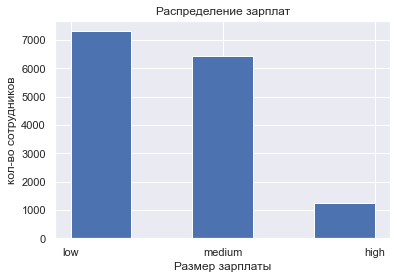

In [40]:
#7.Показать распределение сотрудников по зарплатам
plt.hist(df['salary'],5)
plt.xlabel('Размер зарплаты')
plt.ylabel('кол-во сотрудников')
plt.title('Распределение зарплат')
plt.grid(True)
plt.show()

In [41]:
print('Сотрудников с низкой зарплатой -', len(df[df['salary']=='low']), ' {:.2f}%'.format(len(df[df['salary']=='low'])/len(df)*100))
print('Сотрудников со средней зарплатой -',len(df[df['salary']=='medium']), ' {:.2f}%'.format(len(df[df['salary']=='medium'])/len(df)*100))
print('Сотрудников со высокой зарплатой -',len(df[df['salary']=='high']), ' {:.2f}%'.format(len(df[df['salary']=='high'])/len(df)*100))

Сотрудников с низкой зарплатой - 7316  48.78%
Сотрудников со средней зарплатой - 6446  42.98%
Сотрудников со высокой зарплатой - 1237  8.25%


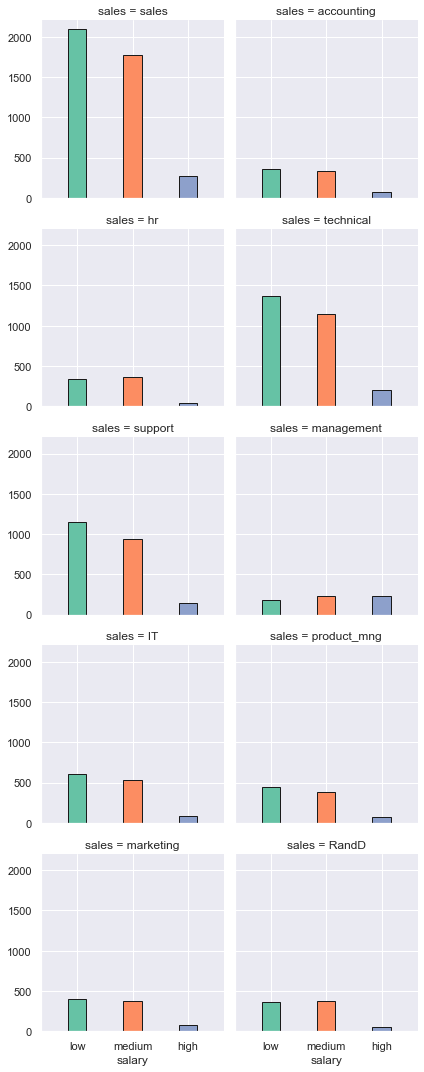

In [42]:
#8.Показать распределение сотрудников по зарплатам совместно с департаментами

bins = 3
g = sns.FacetGrid(df, col="sales", hue="salary", palette="Set2", col_wrap=2)
g.map(plt.hist, 'salary', bins=bins, ec="k")

In [43]:
#9. Сколько сотрудников покинули компанию
print('Компанияю покинули =',df['left'].value_counts()[1],'человек')

Компанияю покинули = 3571 человек


In [44]:
#10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию



In [45]:
df_left= df[df['salary']=='low']['left']
stats.ttest_1samp(df_left, df['left'].mean())

#p-value может говорить нам о том, что среди уволившихся сотрудников очень много людей с низкой зарплатой

Ttest_1sampResult(statistic=11.007411787730103, pvalue=5.828800133014715e-28)

In [46]:
left_eval = df[df['left']==1]['last_evaluation']
stay_eval = df[df['left']==0]['last_evaluation']
stats.ttest_ind(left_eval, stay_eval)


# нет отличия между последними оценками у уволившихся и оставшихся сотрудников
# но судя по корреляции, имется обратная коррляция между last evaluation и увольнениями. Среди уволенных, было много с высоким
# рейтингом оценки

Ttest_indResult(statistic=0.8042416167796329, pvalue=0.4212701963735056)

In [47]:
df_left= df[df['left']==1]
no_prom = df_left.groupby(df_left['promotion_last_5years']).count()
no_prom.filter(items=['index']).sort_values('index', ascending=False)

#ниже можно сделать вывод, что сотрудники уходили в основном потом что их не повышали.

,index
promotion_last_5years,
0,3552
1,19


In [ ]:
#Также это хорошо видно на графике

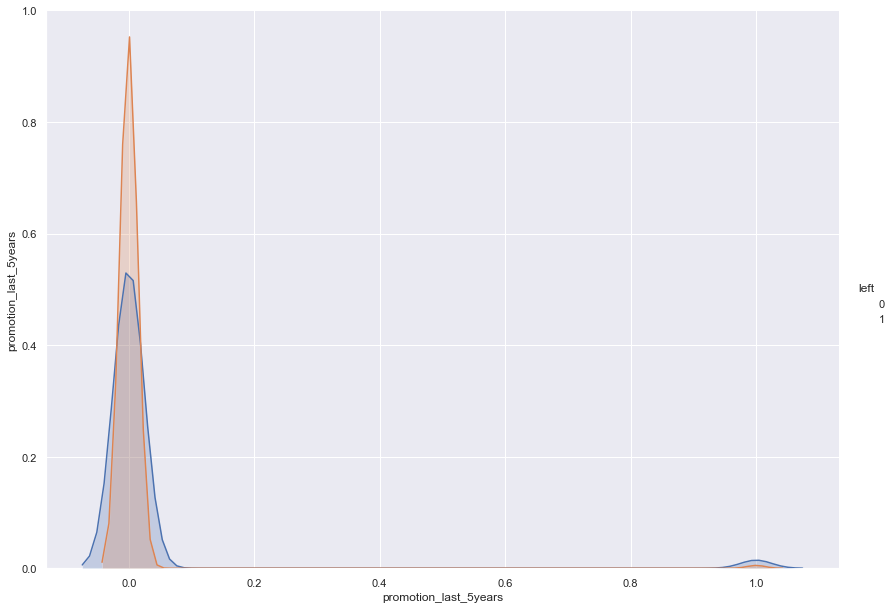

In [48]:
sns.set(rc={'figure.figsize':(25,25)})
fig_1 = sns.pairplot(data=df, vars=["promotion_last_5years"], hue='left', height=8.27, aspect=11.7/8.27)